Neural style transfer atau singkatnya style transfer adalah salah satu contoh aplikasi dari computer vision. Pada Style transfer, 2 buah gambar yaitu satu gambar original, dan satu gambar dari gaya yang kita inginkan akan digabungkan menjadi gambar baru.

Mengimplementasikan style transfer menjadi sangat mudah menggunakan Tensorflow Hub. Tensorflow Hub adalah portal yang menyediakan model-model machine learning yang sudah dilatih dan dapat dipakai untuk transfer learning. Ada 3 domain model yang disediakan di tensorflow hub antara lain, computer vision, natural language processing, serta video classification.

Hal yang paling pertama kita lakukan adalah membuat fungsi untuk mengubah tensor menjadi gambar. Kita perlu mengubah tensor menjadi gambar karena, model yang kita gunakan dari tensorflow hub akan mengembalikan nilai dengan format tensor. Kode di bawah adalah fungsi untuk mengubah tensor menjadi gambar.

In [1]:
import tensorflow as tf
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

Selain mengembalikan nilai dalam bentuk tensor, model yang akan kita pakai dari tensorflow hub juga menerima masukan berupa tensor. Sehingga kita harus mengubah gambar yang akan kita pakai menjadi tensor terlebih dahulu. Kode di bawah adalah fungsi untuk mengubah gambar menjadi tensor.

In [2]:
def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    
    # Resize the image to specific dimensions
    img = tf.image.resize(img, [512, 512])
    img = img[tf.newaxis, :]
    return img

In [3]:
#unggah gambar lalu ubah gambar tersebut menjadi tensor
kucing_tensor = image_to_tensor('kucing.jpg')
style_tensor = image_to_tensor('style.jpg')

Terakhir, jalankan kode di bawah untuk melakukan style transfer pada gambar kita dan menampilkan hasilnya.

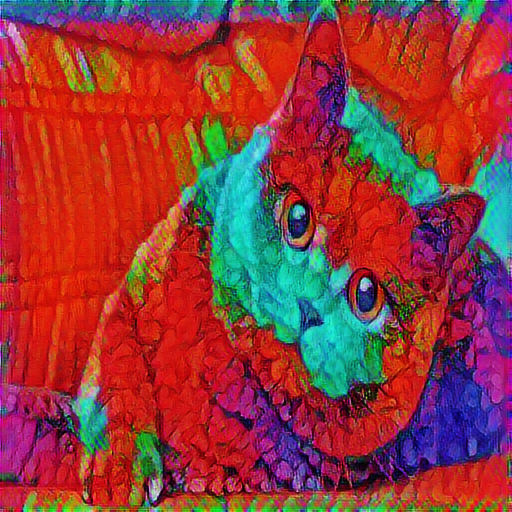

In [4]:
import tensorflow_hub as hub
import numpy as np
import PIL.Image
import time
import functools
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(kucing_tensor), tf.constant(style_tensor))[0]
tensor_to_image(stylized_image)